In [61]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import random
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
import os.path
from tqdm import tqdm
import math
import os
import cv2
import glob

In [62]:
def load_images():    
    X_data = []
    files = glob.glob (r'C:\Users\user\Documents\itamar\normalization\*.PNG')
    for myFile in files:
        print(myFile)
        image = cv2.imread (myFile)
        X_data.append (image)
        plt.figure()
        plt.imshow(image) 
        plt.show()  # display it
    print('X_data shape:', np.array(X_data).shape)
    return X_data
    

In [63]:
def print_img(img, histo_new, histo_old, index, L):
    dpi = 80
    width = img.shape[0]
    height = img.shape[1]
    if height > width:
        figsize = (img.shape[0]*4) / float(dpi), (height)/ float(dpi)
        fig, axs = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1,1]}, figsize=figsize)
    else:
        figsize = (width) / float(dpi), (height*4) / float(dpi)
        fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [3, 1,1]}, figsize=figsize)

    fig.suptitle("Enhanced Image with L:" + str(L))
    axs[0].title.set_text("Enhanced Image")
    axs[0].imshow(img, vmin=np.amin(img), vmax=np.amax(img), cmap='gray')

    axs[1].title.set_text("Equalized histogram")
    axs[1].plot(histo_new, color='#f77f00')
    axs[1].bar(np.arange(len(histo_new)), histo_new, color='#003049')

    axs[2].title.set_text("Main histogram")
    axs[2].plot(histo_old, color='#ef476f')
    axs[2].bar(np.arange(len(histo_old)), histo_old, color='#b7b7a4')
    #plt.tight_layout()
    #plt.savefig("e" + index + str(L)+".pdf")
    #plt.savefig("e" + index + str(L)+".png")

In [64]:
def print_histogram(_histrogram, name, title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_" + name)

In [65]:
def generate_histogram(img, print, index):
    #calculate mean value from RGB channels and flatten to 1D array
    vals = img.mean(axis=2).flatten()
    # calculate histogram
    counts, bins = np.histogram(vals, range(257))
    #plot histogram centered on values 0..255
    a = plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
    plt.xlim([-0.5, 255.5])
    plt.show()
    return vals, img

In [66]:
#def generate_histogram(img, print, index):
 #   imag = cv2.imread(img)
   # histr = cv2.calcHist([imag],[0],None,[256],[0,256])
   # plt.plot(histr)
   # plt.show()

In [67]:
def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    print_histogram(eq_histo, name="eq_"+str(index), title="Equalized Histogram")
    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, print=False, index=index)
    print_img(img=en_img, histo_new=hist_img, histo_old=histo, index=str(index), L=L)
    return eq_histo

In [68]:
def find_value_target(val, target_arr):
    key = np.where(target_arr == val)[0]

    if len(key) == 0:
        key = find_value_target(val+1, target_arr)
        if len(key) == 0:
            key = find_value_target(val-1, target_arr)
    vvv = key[0]
    return vvv

In [69]:
def match_histogram(inp_img, hist_input, e_hist_input, e_hist_target, _print=True):
    '''map from e_inp_hist to 'target_hist '''
    en_img = np.zeros_like(inp_img)
    tran_hist = np.zeros_like(e_hist_input)
    for i in range(len(e_hist_input)):
        tran_hist[i] = find_value_target(val=e_hist_input[i], target_arr=e_hist_target)
    print_histogram(tran_hist, name="trans_hist_", title="Transferred Histogram")
    '''enhance image as well:'''
    for x_pixel in range(inp_img.shape[0]):
        for y_pixel in range(inp_img.shape[1]):
            pixel_val = int(inp_img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = tran_hist[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, print=False, index=3)
    print_img(img=en_img, histo_new=hist_img, histo_old=hist_input, index=str(3), L=L)


Loading Images:
C:\Users\user\Documents\itamar\normalization\NC121200000060000H0000000P020700.SCN - Series 1_25_12.png


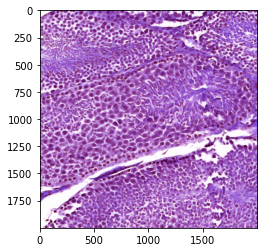

C:\Users\user\Documents\itamar\normalization\NC121200000060000H0000000P020700.SCN - Series 1_28_11.png


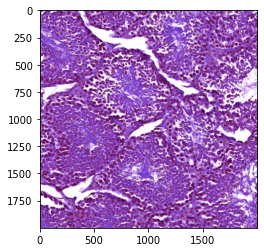

C:\Users\user\Documents\itamar\normalization\NC121200000060000H0000000P020700.SCN - Series 1_28_14.png


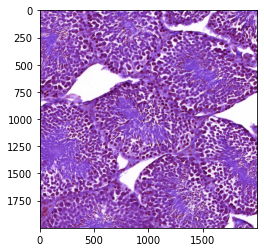

C:\Users\user\Documents\itamar\normalization\NC121200000060000H0000000P020700.SCN - Series 1_30_31.png


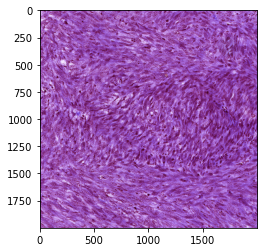

  0%|          | 0/4 [00:00<?, ?it/s]

X_data shape: (4, 2000, 2000, 3)

generating HistogramS:


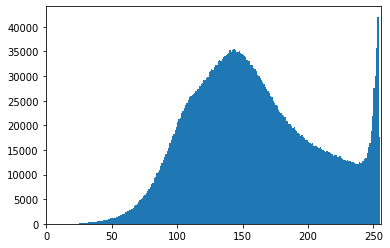

In [ ]:
if __name__ == '__main__':
    L=50
    print("\r\nLoading Images:")
    imgs = load_images()
    #SOURCE_IMAGE = "NC121200000060000H0000000P020700.SCN - Series 1_25_12.jpg"
    REFERENCE_IMAGE = "target.tif"
    print("\r\ngenerating HistogramS:")
    gr_img_arr = []
    gr_hist_arr = []
    eq_hist_arr = []
    index = 0
    for img in tqdm(imgs):
        hist_img, gr_img = generate_histogram(img, print=True, index=index)
        gr_hist_arr.append(hist_img)
        gr_img_arr.append(gr_img)
        eq_hist_arr.append(equalize_histogram(gr_img, hist_img, L))
        index += 1
    #hist_img = generate_histogram(SOURCE_IMAGE, print = True, index=index)
    #gr_img = generate_histogram(REFERENCE_IMAGE, print=True, index=index)
    #gr_hist_arr.append(hist_img)
    #gr_img_arr.append(gr_img)
    #eq_hist_arr.append(equalize_histogram(gr_img, hist_img, L))
    match_histogram(inp_img=gr_img_arr[0], hist_input=gr_hist_arr[0], e_hist_input=eq_hist_arr[0], e_hist_target=eq_hist_arr[0])
    
    
    
    